In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline

In [130]:
df = pd.read_csv("../data/raw_data/SLP-USD.csv")
df.shape
df.head()

,Date,Open,High,Low,Close,Volume
0,2020-07-08,0.199600,0.200201,0.109705,0.110012,8412
1,2020-07-09,0.110270,0.149273,0.062864,0.091263,5864
2,2020-07-10,0.091247,0.104638,0.045408,0.055206,302
3,2020-07-11,0.055206,0.089824,0.023832,0.033257,380
4,2020-07-12,0.033253,0.033525,0.018149,0.018416,42


In [131]:
df["Roc"] = df["Close"].pct_change() * 100
# df.dropna(inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume,Roc
0,2020-07-08,0.199600,0.200201,0.109705,0.110012,8412,NaN
1,2020-07-09,0.110270,0.149273,0.062864,0.091263,5864,-17.042685
2,2020-07-10,0.091247,0.104638,0.045408,0.055206,302,-39.508893
3,2020-07-11,0.055206,0.089824,0.023832,0.033257,380,-39.758360
4,2020-07-12,0.033253,0.033525,0.018149,0.018416,42,-44.625190


In [132]:
df["Roc"].max()

186.4880582484656

Text(0.5, 1.0, 'Price of Bitcoin')

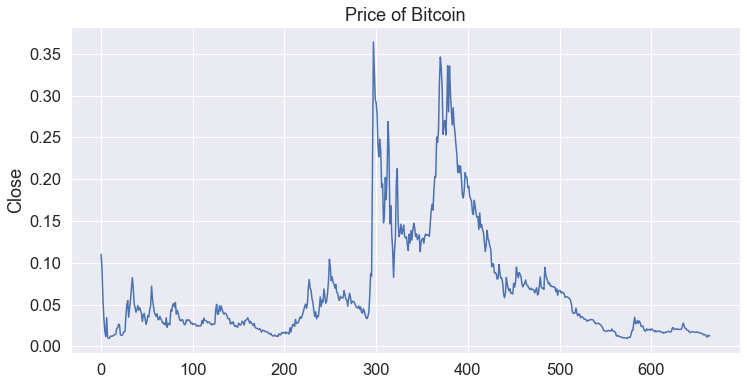

In [133]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y="Close", data=df).set_title("Price of Bitcoin")

In [134]:
data = df.iloc[:, 4]
hist = []
target = []
length = 90
for i in range(len(data)-length):
    x = data[i:i+length]
    y = data[i+length]
    hist.append(x)
    target.append(y)

In [135]:
hist = np.array(hist)
target = np.array(target)
target = target.reshape(-1,1)

In [136]:
target.shape

(575, 1)

In [137]:
hist

array([[0.110012, 0.091263, 0.055206, ..., 0.030271, 0.031912, 0.03166 ],
       [0.091263, 0.055206, 0.033257, ..., 0.031912, 0.03166 , 0.027817],
       [0.055206, 0.033257, 0.018416, ..., 0.03166 , 0.027817, 0.025805],
       ...,
       [0.009866, 0.009951, 0.009361, ..., 0.013807, 0.0122  , 0.010861],
       [0.009951, 0.009361, 0.010827, ..., 0.0122  , 0.010861, 0.013302],
       [0.009361, 0.010827, 0.010731, ..., 0.010861, 0.013302, 0.01248 ]])

In [138]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
hist_scaled = sc.fit_transform(hist)
target_scaled = sc.fit_transform(target)

In [139]:
hist_scaled = hist_scaled.reshape((len(hist_scaled), length, 1))
print(hist_scaled.shape)
print(target_scaled.shape)

(575, 90, 1)
(575, 1)


In [140]:
# shapeden 30 çıkarıyoruz
X_train = hist_scaled[:545,:,:]
X_test = hist_scaled[545:,:,:]
y_train = target_scaled[:545,:]
y_test = target_scaled[545:,:]

In [141]:
import tensorflow as tf
from tensorflow.keras import layers

In [142]:
model = tf.keras.Sequential()
model.add(layers.LSTM(units=32, return_sequences=True,
                  input_shape=(90,1), dropout=0.2))
model.add(layers.LSTM(units=32, return_sequences=True,
                  dropout=0.2))
model.add(layers.LSTM(units=32, dropout=0.2))
model.add(layers.Dense(units=1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 90, 32)            4352      
_________________________________________________________________
lstm_13 (LSTM)               (None, 90, 32)            8320      
_________________________________________________________________
lstm_14 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [143]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [144]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
18/18 [==============================] - 1s 74ms/step - loss: 0.0300
Epoch 2/100
18/18 [==============================] - 1s 66ms/step - loss: 0.0160
Epoch 3/100
18/18 [==============================] - 1s 67ms/step - loss: 0.0153
Epoch 4/100
18/18 [==============================] - 1s 62ms/step - loss: 0.0131
Epoch 5/100
18/18 [==============================] - 1s 62ms/step - loss: 0.0129
Epoch 6/100
18/18 [==============================] - 1s 63ms/step - loss: 0.0112
Epoch 7/100
18/18 [==============================] - 1s 64ms/step - loss: 0.0107
Epoch 8/100
18/18 [==============================] - 1s 61ms/step - loss: 0.0104
Epoch 9/100
18/18 [==============================] - 1s 64ms/step - loss: 0.0101
Epoch 10/100
18/18 [==============================] - 1s 63ms/step - loss: 0.0086
Epoch 11/100
18/18 [==============================] - 1s 66ms/step - loss: 0.0106
Epoch 12/100
18/18 [==============================] - 1s 63ms/step - loss: 0.0089
Epoch 13/100
18/18 [=====

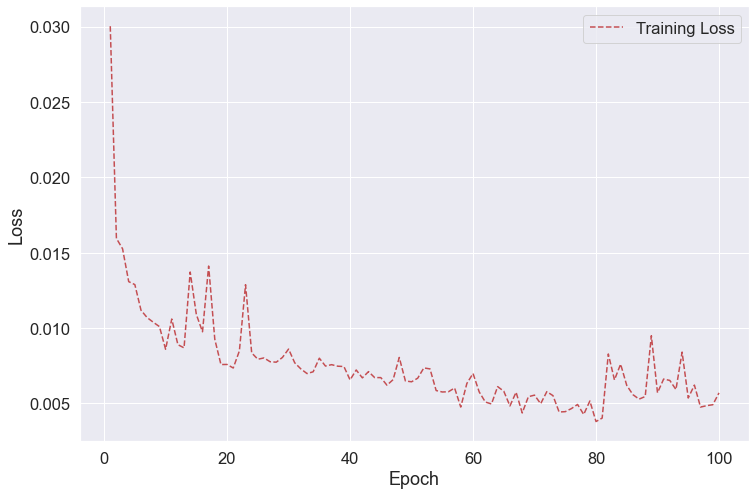

In [145]:
loss = history.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

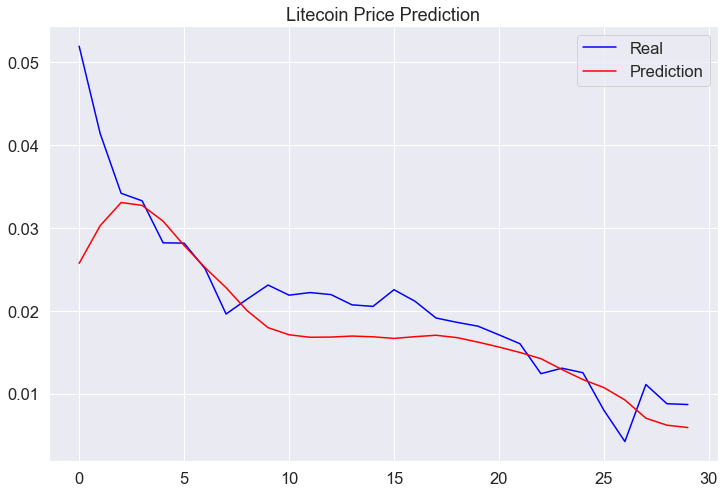

In [146]:
pred = model.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Litecoin Price Prediction')
plt.legend()
plt.show()

In [149]:
real_preds = sc.inverse_transform(pred)
real_truths = sc.inverse_transform(y_test)

pred_yon = []
gercek_yon = []
para = 100
islem_adedi = 0

for i in range(len(real_preds)-1):
    
    if real_preds[i] < real_preds[i+1]:
        islem_adedi += 1
        tahmin_edilen_artis = real_preds[i+1] / real_preds[i]
        gercek_artis = real_truths[i+1] / real_truths[i]
        print(tahmin_edilen_artis, gercek_artis)
        
        para *= gercek_artis
        # print(tahmin_edilen_artis, gercek_artis)
        print(f"İşlem = {islem_adedi}, işlem sonundaki para: {para}")
        print()
        # print(tahmin_edilen_artis, gercek_artis)
print(para)

[1.0870539] [0.86558462]
İşlem = 1, işlem sonundaki para: [86.5584616]

[1.049476] [0.89343923]
İşlem = 2, işlem sonundaki para: [77.33472485]

[1.0005779] [0.99495328]
İşlem = 3, işlem sonundaki para: [76.94443805]

[1.0027796] [0.97440535]
İşlem = 4, işlem sonundaki para: [74.97507235]

[1.0049202] [0.97165904]
İşlem = 5, işlem sonundaki para: [72.85020671]

[1.0039335] [0.95743412]
İşlem = 6, işlem sonundaki para: [69.74927366]

[69.74927366]
